In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import importlib
from graphviz import Digraph, Source
from pygraphviz import AGraph
import numpy as np
import matplotlib.image as mpimg
from IPython.display import Image
import matplotlib.pyplot as plt
from flow import Node, CreditFlow, Graph, get_source_nodes, topo_sort, flatten_graph, eval_graph, boundary_graph, single_source_graph, viz_graph, save_graph
import copy
from flow import ParallelCreditFlow

In [5]:
def build_random_graph(n_nodes=10):
    nodes = []
    name = 'a'
    for _ in range(n_nodes):
        args = [nodes[i] for i in range(0 if len(nodes) == 0 else np.random.choice(len(nodes)))]
        node = Node(name, lambda *args: (sum(args) >= len(args)).astype(int), args) # and function
        # node = Node(name, lambda *args: int(sum(args) >= 1), args) # or function
        name = chr(ord(name) + 1)
        nodes.append(node)

    print(len(nodes), "nodes")
    source_nodes = get_source_nodes(nodes)
    n_relevant_features = np.random.choice(range(1, len(nodes)))
    feature_mask = np.random.choice(range(1, len(nodes)), n_relevant_features, replace=False)
    args = nodes
    target_node = Node('Y', lambda *args: sum([arg for i, arg in enumerate(args) if i in feature_mask]), 
                       args, is_target_node=True)
    nodes.append(target_node)
    
    graph = Graph(nodes,
                  dict((node.name, lambda: 0) for node in source_nodes),
                  dict((node.name, lambda: 1) for node in source_nodes),
                  )
    return graph

graph = build_random_graph()

10 nodes


sampling: 100%|██████████| 100/100 [00:00<00:00, 553.75it/s]


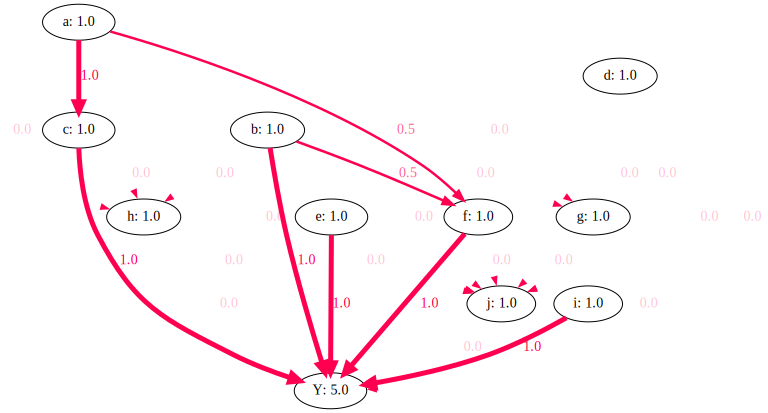

In [6]:
verbose = False
cf = CreditFlow(graph, verbose=verbose, nruns=100, visualize=verbose)
cf.run()

G = cf.credit2dot(format_str="{:.1f}")
viz_graph(G)

sampling: 100%|██████████| 100/100 [00:00<00:00, 1010.53it/s]


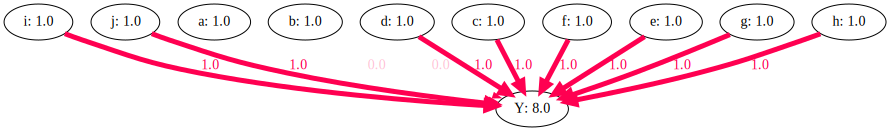

In [5]:
shap_graph = flatten_graph(graph)
verbose = False
cf = CreditFlow(shap_graph, verbose=verbose, nruns=100, visualize=verbose)
cf.run()

G = cf.credit2dot(format_str="{:.1f}")
viz_graph(G)

sampling: 100%|██████████| 100/100 [00:00<00:00, 438.46it/s]


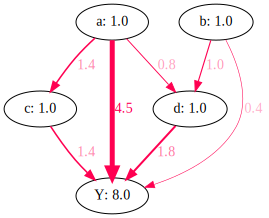

In [6]:
bgraph = boundary_graph(graph, ['a', 'b', 'c', 'd'])
verbose = False
cf = CreditFlow(bgraph, verbose=verbose, nruns=100, visualize=verbose)
cf.run()

G = cf.credit2dot(format_str="{:.1f}")
viz_graph(G)

Above we show explanation of a random system.

The first is Shapley flow, the second is Shap, and the third is some arbitrary boundary.

sampling: 100%|██████████| 100/100 [00:00<00:00, 638.37it/s]


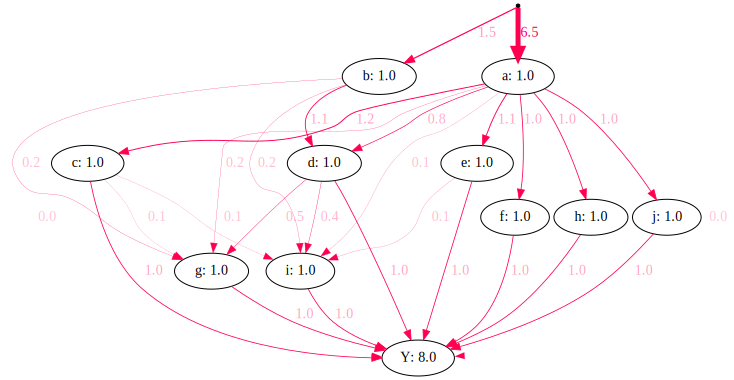

In [7]:
sgraph = single_source_graph(graph)
verbose = False
cf = CreditFlow(sgraph, verbose=verbose, nruns=100, visualize=verbose)
cf.run()

G = cf.credit2dot(format_str="{:.1f}")
viz_graph(G)

# Intervention simulation

In [8]:
sources = get_source_nodes(graph)
d = dict((node.name, 0) for node in sources)
d.update({'d': 1})
print('output:', eval_graph(graph, d))

output: [1]


# Parallel runs

In [46]:
nruns = 12000

In [47]:
cf = CreditFlow(graph, nruns=nruns)
%time cf.run()

sampling: 100%|██████████| 12000/12000 [00:25<00:00, 466.63it/s]

CPU times: user 26.7 s, sys: 6.71 s, total: 33.4 s
Wall time: 25.7 s


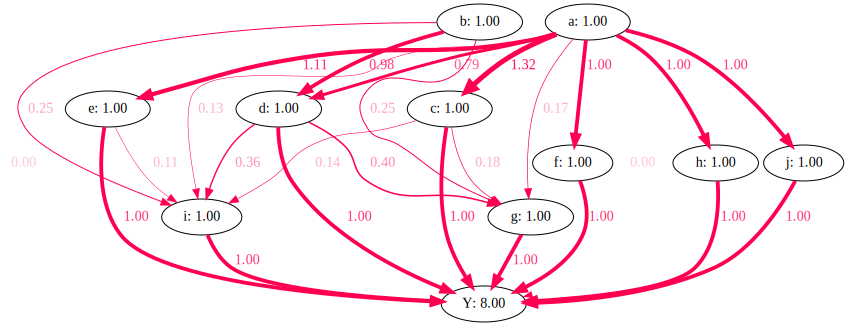

In [11]:
cf.draw()

In [9]:
cf = ParallelCreditFlow(graph, nruns=12000, njobs=8)
%time cf.run_subprocess()

12000 runs with 8 jobs
wait [True, True, True, True, True, True, True, True]...
wait [True, True, True, True, True, True, True, True]...
wait [True, True, True, True, True, True, True, True]...
wait [True, True, True, True, True, True, True, True]...
wait [True, True, True, True, True, True, True, True]...
wait [True, True, True, True, True, True, True, True]...
wait [True, True, True, True, True, True, True, True]...
wait [True, True, True, True, True, True, True, True]...
wait [True, True, True, True, True, True, True, True]...
wait [True, True, True, True, True, True, True, True]...
done
CPU times: user 21.4 ms, sys: 41.3 ms, total: 62.7 ms
Wall time: 10.1 s


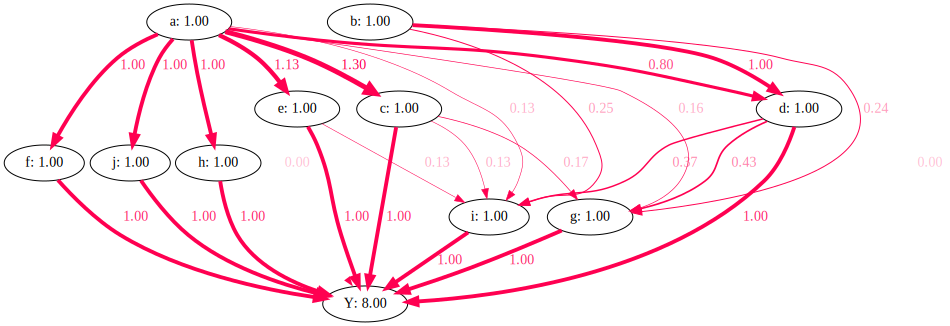

In [43]:
cf.draw()

In [12]:
cf = ParallelCreditFlow(graph, nruns=12000, njobs=8)
%time cf.run_dill()

12000 runs with 8 jobs
CPU times: user 41.1 ms, sys: 57.4 ms, total: 98.5 ms
Wall time: 8.91 s


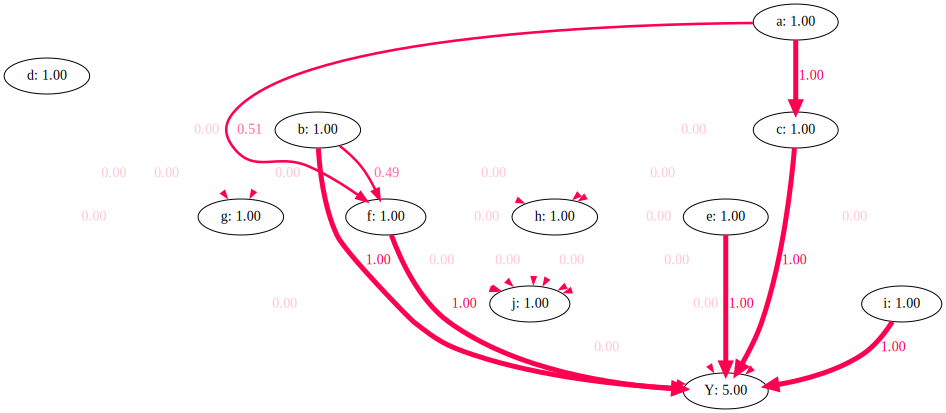

In [8]:
cf.draw()

In [17]:
cf = ParallelCreditFlow(graph, nruns=12000, njobs=8)
%time cf.run_synthetic_process(method='mpd')

12000 runs with 8 jobs


sampling: 100%|██████████| 1500/1500 [00:07<00:00, 209.58it/s]


CPU times: user 512 ms, sys: 219 ms, total: 731 ms
Wall time: 7.24 s


In [26]:
cf = ParallelCreditFlow(graph, nruns=3000, njobs=8)
%time cf.run_thread()

3000 runs with 8 jobs
9.904003143310547
CPU times: user 9.88 s, sys: 4.92 s, total: 14.8 s
Wall time: 9.91 s


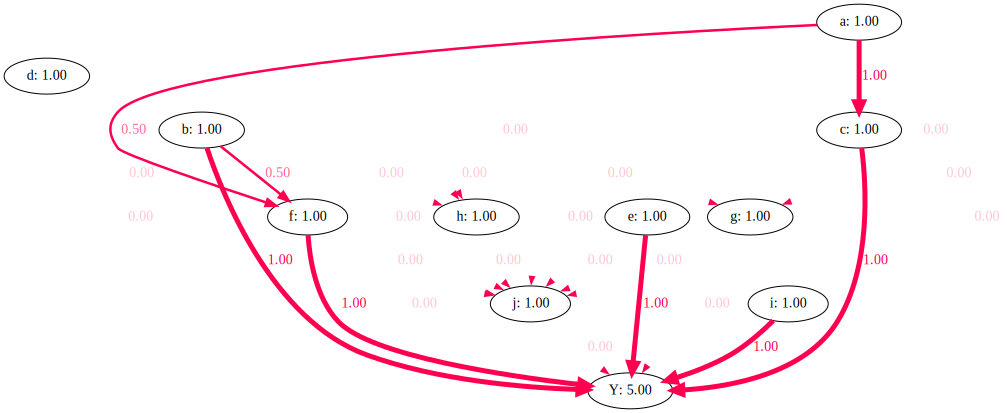

In [23]:
cf.draw()